<div style="color:red;background-color:black">
Diamond Light Source

<h1 style="color:red;background-color:antiquewhite"> Python Libraries: SciKitImage</h1>  

©2000-20 Chris Seddon 
</div>

## 1
Execute the following cell to activate styling for this tutorial

In [1]:
%matplotlib inline
from IPython.display import HTML
HTML(f"<style>{open('my.css').read()}</style>")

## 2
SciKitImage is a library that performs a number of image processing transformations on images.  All images, once read into memory are stored as Numpy arrays.  Images can be full color or monochrome.

To get the feel of what an image looks like in memory, consider the following Numpy array:

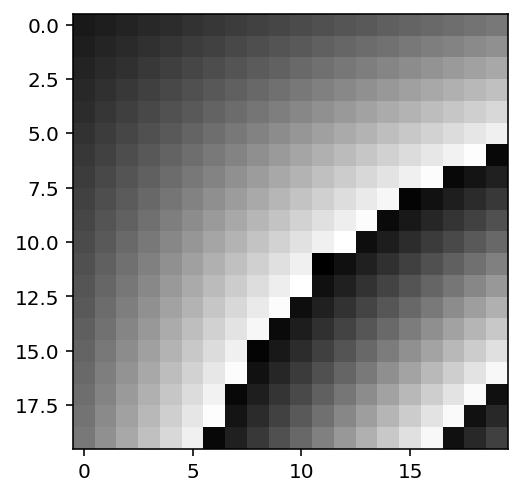

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.subplots(dpi=72*2)

data = np.array(
      [[ 25,  30,  35,  40,  45,  50,  55,  60,  65,  70,  75,  80,  85,  90,  95, 100, 105, 110, 115, 120],
       [ 30,  36,  42,  48,  54,  60,  66,  72,  78,  84,  90,  96, 102, 108, 114, 120, 126, 132, 138, 144],
       [ 35,  42,  49,  56,  63,  70,  77,  84,  91,  98, 105, 112, 119, 126, 133, 140, 147, 154, 161, 168],
       [ 40,  48,  56,  64,  72,  80,  88,  96, 104, 112, 120, 128, 136, 144, 152, 160, 168, 176, 184, 192],
       [ 45,  54,  63,  72,  81,  90,  99, 108, 117, 126, 135, 144, 153, 162, 171, 180, 189, 198, 207, 216],
       [ 50,  60,  70,  80,  90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240],
       [ 55,  66,  77,  88,  99, 110, 121, 132, 143, 154, 165, 176, 187, 198, 209, 220, 231, 242, 253,   8],
       [ 60,  72,  84,  96, 108, 120, 132, 144, 156, 168, 180, 192, 204, 216, 228, 240, 252,   8,  20,  32],
       [ 65,  78,  91, 104, 117, 130, 143, 156, 169, 182, 195, 208, 221, 234, 247,   4,  17,  30,  43,  56],
       [ 70,  84,  98, 112, 126, 140, 154, 168, 182, 196, 210, 224, 238, 252,  10,  24,  38,  52,  66,  80],
       [ 75,  90, 105, 120, 135, 150, 165, 180, 195, 210, 225, 240, 255,  14,  29,  44,  59,  74,  89, 104],
       [ 80,  96, 112, 128, 144, 160, 176, 192, 208, 224, 240,   0,  16,  32,  48,  64,  80,  96, 112, 128],
       [ 85, 102, 119, 136, 153, 170, 187, 204, 221, 238, 255,  16,  33,  50,  67,  84, 101, 118, 135, 152],
       [ 90, 108, 126, 144, 162, 180, 198, 216, 234, 252,  14,  32,  50,  68,  86, 104, 122, 140, 158, 176],
       [ 95, 114, 133, 152, 171, 190, 209, 228, 247,  10,  29,  48,  67,  86, 105, 124, 143, 162, 181, 200],
       [100, 120, 140, 160, 180, 200, 220, 240,   4,  24,  44,  64,  84, 104, 124, 144, 164, 184, 204, 224],
       [105, 126, 147, 168, 189, 210, 231, 252,  17,  38,  59,  80, 101, 122, 143, 164, 185, 206, 227, 248],
       [110, 132, 154, 176, 198, 220, 242,   8,  30,  52,  74,  96, 118, 140, 162, 184, 206, 228, 250,  16],
       [115, 138, 161, 184, 207, 230, 253,  20,  43,  66,  89, 112, 135, 158, 181, 204, 227, 250,  17,  40],
       [120, 144, 168, 192, 216, 240,   8,  32,  56,  80, 104, 128, 152, 176, 200, 224, 248,  16,  40,  64]])
plt.imshow(data, cmap="gray")
plt.show()

## 3
We've use MatPlotLib to display the image.  Note that MatPlotLib always uses a colormap when displayinh images and this gives false colors unless we use the "gray" colormap.  

As you can see, the pixels have a value between 0 and 255 to represent color, with:
* black is 0
* white is 255

Images can also be represented as floats between 0.0 and 1.0.  Here is the same image using floats:

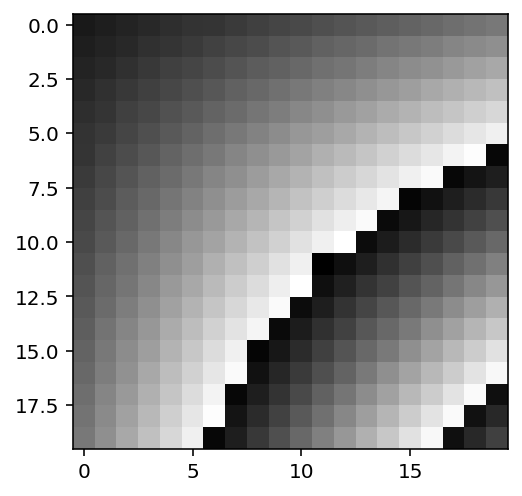

In [3]:
import numpy as np
import matplotlib.pyplot as plt
plt.subplots(dpi=72*2)

data = np.array(
      [[0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 , 0.21, 0.23, 0.25, 0.27, 0.29, 0.31, 0.33, 0.35, 0.37, 0.39, 0.41, 0.43, 0.45, 0.47],
       [0.12, 0.14, 0.16, 0.19, 0.21, 0.23, 0.26, 0.28, 0.3 , 0.33, 0.35, 0.38, 0.4 , 0.42, 0.45, 0.47, 0.49, 0.52, 0.54, 0.56],
       [0.14, 0.16, 0.19, 0.22, 0.25, 0.27, 0.3 , 0.33, 0.36, 0.38, 0.41, 0.44, 0.46, 0.49, 0.52, 0.55, 0.57, 0.6 , 0.63, 0.66],
       [0.16, 0.19, 0.22, 0.25, 0.28, 0.31, 0.34, 0.38, 0.41, 0.44, 0.47, 0.5 , 0.53, 0.56, 0.59, 0.62, 0.66, 0.69, 0.72, 0.75],
       [0.18, 0.21, 0.25, 0.28, 0.32, 0.35, 0.39, 0.42, 0.46, 0.49, 0.53, 0.56, 0.6 , 0.63, 0.67, 0.7 , 0.74, 0.77, 0.81, 0.84],
       [0.2 , 0.23, 0.27, 0.31, 0.35, 0.39, 0.43, 0.47, 0.51, 0.55, 0.59, 0.62, 0.66, 0.7 , 0.74, 0.78, 0.82, 0.86, 0.9 , 0.94],
       [0.21, 0.26, 0.3 , 0.34, 0.39, 0.43, 0.47, 0.52, 0.56, 0.6 , 0.64, 0.69, 0.73, 0.77, 0.82, 0.86, 0.9 , 0.95, 0.99, 0.03],
       [0.23, 0.28, 0.33, 0.38, 0.42, 0.47, 0.52, 0.56, 0.61, 0.66, 0.7 , 0.75, 0.8 , 0.84, 0.89, 0.94, 0.98, 0.03, 0.08, 0.12],
       [0.25, 0.3 , 0.36, 0.41, 0.46, 0.51, 0.56, 0.61, 0.66, 0.71, 0.76, 0.81, 0.86, 0.91, 0.96, 0.02, 0.07, 0.12, 0.17, 0.22],
       [0.27, 0.33, 0.38, 0.44, 0.49, 0.55, 0.6 , 0.66, 0.71, 0.77, 0.82, 0.88, 0.93, 0.98, 0.04, 0.09, 0.15, 0.2 , 0.26, 0.31],
       [0.29, 0.35, 0.41, 0.47, 0.53, 0.59, 0.64, 0.7 , 0.76, 0.82, 0.88, 0.94, 1.  , 0.05, 0.11, 0.17, 0.23, 0.29, 0.35, 0.41],
       [0.31, 0.38, 0.44, 0.5 , 0.56, 0.62, 0.69, 0.75, 0.81, 0.88, 0.94, 0.  , 0.06, 0.12, 0.19, 0.25, 0.31, 0.38, 0.44, 0.5 ],
       [0.33, 0.4 , 0.46, 0.53, 0.6 , 0.66, 0.73, 0.8 , 0.86, 0.93, 1.  , 0.06, 0.13, 0.2 , 0.26, 0.33, 0.39, 0.46, 0.53, 0.59],
       [0.35, 0.42, 0.49, 0.56, 0.63, 0.7 , 0.77, 0.84, 0.91, 0.98, 0.05, 0.12, 0.2 , 0.27, 0.34, 0.41, 0.48, 0.55, 0.62, 0.69],
       [0.37, 0.45, 0.52, 0.59, 0.67, 0.74, 0.82, 0.89, 0.96, 0.04, 0.11, 0.19, 0.26, 0.34, 0.41, 0.48, 0.56, 0.63, 0.71, 0.78],
       [0.39, 0.47, 0.55, 0.62, 0.7 , 0.78, 0.86, 0.94, 0.02, 0.09, 0.17, 0.25, 0.33, 0.41, 0.48, 0.56, 0.64, 0.72, 0.8 , 0.88],
       [0.41, 0.49, 0.57, 0.66, 0.74, 0.82, 0.9 , 0.98, 0.07, 0.15, 0.23, 0.31, 0.39, 0.48, 0.56, 0.64, 0.72, 0.8 , 0.89, 0.97],
       [0.43, 0.52, 0.6 , 0.69, 0.77, 0.86, 0.95, 0.03, 0.12, 0.2 , 0.29, 0.38, 0.46, 0.55, 0.63, 0.72, 0.8 , 0.89, 0.98, 0.06],
       [0.45, 0.54, 0.63, 0.72, 0.81, 0.9 , 0.99, 0.08, 0.17, 0.26, 0.35, 0.44, 0.53, 0.62, 0.71, 0.8 , 0.89, 0.98, 0.07, 0.16],
       [0.47, 0.56, 0.66, 0.75, 0.84, 0.94, 0.03, 0.12, 0.22, 0.31, 0.41, 0.5 , 0.59, 0.69, 0.78, 0.88, 0.97, 0.06, 0.16, 0.25]])
plt.imshow(data, cmap="gray")
plt.show()

## 4
Color images are more complicated.  In this case each pixel has a value for the red, green and blue component.  Again values are in the range 0 to 255 or 0.0 to 1.0.

Here is a 10 x 10 color array:

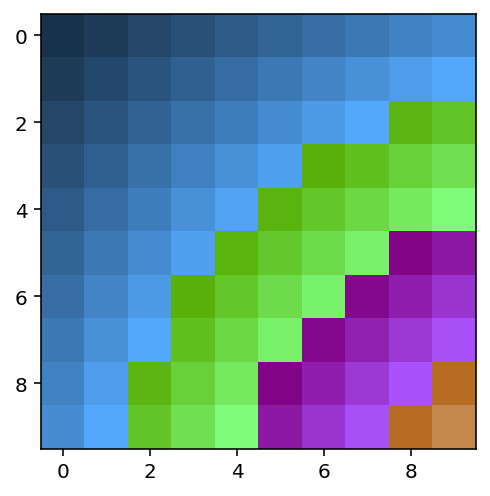

In [4]:
import numpy as np
import matplotlib.pyplot as plt
plt.subplots(dpi=72*2)

data = np.array(
[
    [[ 25, 50, 75],[ 30, 60, 90],[ 35, 70,105],[ 40, 80,120],[ 45, 90,135],[ 50,100,150],[ 55,110,165],[ 60,120,180],[ 65,130,195],[ 70,140,210]],
    [[ 30, 60, 90],[ 36, 72,108],[ 42, 84,126],[ 48, 96,144],[ 54,108,162],[ 60,120,180],[ 66,132,198],[ 72,144,216],[ 78,156,234],[ 84,168,252]],
    [[ 35, 70,105],[ 42, 84,126],[ 49, 98,147],[ 56,112,168],[ 63,126,189],[ 70,140,210],[ 77,154,231],[ 84,168,252],[ 91,182, 17],[ 98,196, 38]],
    [[ 40, 80,120],[ 48, 96,144],[ 56,112,168],[ 64,128,192],[ 72,144,216],[ 80,160,240],[ 88,176,  8],[ 96,192, 32],[104,208, 56],[112,224, 80]],
    [[ 45, 90,135],[ 54,108,162],[ 63,126,189],[ 72,144,216],[ 81,162,243],[ 90,180, 14],[ 99,198, 41],[108,216, 68],[117,234, 95],[126,252,122]],
    [[ 50,100,150],[ 60,120,180],[ 70,140,210],[ 80,160,240],[ 90,180, 14],[100,200, 44],[110,220, 74],[120,240,104],[130,  4,134],[140, 24,164]],
    [[ 55,110,165],[ 66,132,198],[ 77,154,231],[ 88,176,  8],[ 99,198, 41],[110,220, 74],[121,242,107],[132,  8,140],[143, 30,173],[154, 52,206]],
    [[ 60,120,180],[ 72,144,216],[ 84,168,252],[ 96,192, 32],[108,216, 68],[120,240,104],[132,  8,140],[144, 32,176],[156, 56,212],[168, 80,248]],
    [[ 65,130,195],[ 78,156,234],[ 91,182, 17],[104,208, 56],[117,234, 95],[130,  4,134],[143, 30,173],[156, 56,212],[169, 82,251],[182,108, 34]],
    [[ 70,140,210],[ 84,168,252],[ 98,196, 38],[112,224, 80],[126,252,122],[140, 24,164],[154, 52,206],[168, 80,248],[182,108, 34],[196,136, 76]],
])
plt.imshow(data, cmap="gray")
plt.show()

## 5
Color images can also contain a transparency factor.  This is added to the RGB value for each pixel.  In this example I've set it to 200 for the top left pixels and 100 everywhere else:

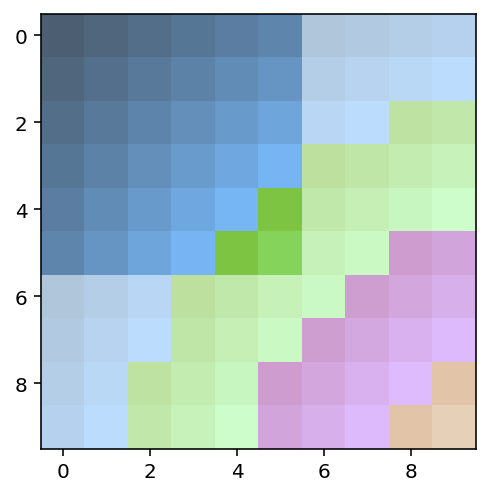

In [5]:
import numpy as np
import matplotlib.pyplot as plt
plt.subplots(dpi=72*2)

data = np.array(
[
    [[ 25, 50, 75,200],[ 30, 60, 90,200],[ 35, 70,105,200],[ 40, 80,120,200],[ 45, 90,135,200],[ 50,100,150,200],[ 55,110,165,100],[ 60,120,180,100],[ 65,130,195,100],[ 70,140,210,100]],
    [[ 30, 60, 90,200],[ 36, 72,108,200],[ 42, 84,126,200],[ 48, 96,144,200],[ 54,108,162,200],[ 60,120,180,200],[ 66,132,198,100],[ 72,144,216,100],[ 78,156,234,100],[ 84,168,252,100]],
    [[ 35, 70,105,200],[ 42, 84,126,200],[ 49, 98,147,200],[ 56,112,168,200],[ 63,126,189,200],[ 70,140,210,200],[ 77,154,231,100],[ 84,168,252,100],[ 91,182, 17,100],[ 98,196, 38,100]],
    [[ 40, 80,120,200],[ 48, 96,144,200],[ 56,112,168,200],[ 64,128,192,200],[ 72,144,216,200],[ 80,160,240,200],[ 88,176,  8,100],[ 96,192, 32,100],[104,208, 56,100],[112,224, 80,100]],
    [[ 45, 90,135,200],[ 54,108,162,200],[ 63,126,189,200],[ 72,144,216,200],[ 81,162,243,200],[ 90,180, 14,200],[ 99,198, 41,100],[108,216, 68,100],[117,234, 95,100],[126,252,122,100]],
    [[ 50,100,150,200],[ 60,120,180,200],[ 70,140,210,200],[ 80,160,240,200],[ 90,180, 14,200],[100,200, 44,200],[110,220, 74,100],[120,240,104,100],[130,  4,134,100],[140, 24,164,100]],
    [[ 55,110,165,100],[ 66,132,198,100],[ 77,154,231,100],[ 88,176,  8,100],[ 99,198, 41,100],[110,220, 74,100],[121,242,107,100],[132,  8,140,100],[143, 30,173,100],[154, 52,206,100]],
    [[ 60,120,180,100],[ 72,144,216,100],[ 84,168,252,100],[ 96,192, 32,100],[108,216, 68,100],[120,240,104,100],[132,  8,140,100],[144, 32,176,100],[156, 56,212,100],[168, 80,248,100]],
    [[ 65,130,195,100],[ 78,156,234,100],[ 91,182, 17,100],[104,208, 56,100],[117,234, 95,100],[130,  4,134,100],[143, 30,173,100],[156, 56,212,100],[169, 82,251,100],[182,108, 34,100]],
    [[ 70,140,210,100],[ 84,168,252,100],[ 98,196, 38,100],[112,224, 80,100],[126,252,122,100],[140, 24,164,100],[154, 52,206,100],[168, 80,248,100],[182,108, 34,100],[196,136, 76,100]],
])
plt.imshow(data, cmap="gray")
plt.show()

## 6
Now lets work with a real monochrome image of rice grains.  We'll use PIL to read the image into memory and then convert to Numpy array of int:

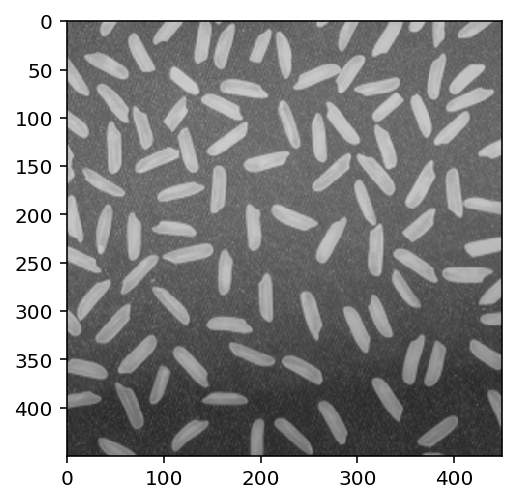

In [6]:
import numpy as np
import PIL.Image
import matplotlib.pyplot as plt
plt.subplots(dpi=72*2)

image = PIL.Image.open("images/rice.jpg")
rice = np.asarray(image, dtype="int32")
plt.imshow(rice, cmap="gray")
plt.show()

## 7
The idea is to count the number of grains of rice in this image.  

Although the rice image looks monochrome it is actually a color image with the red, green and blue values equal for any particular pixel.  Let's print the shape of the Numpy array and look at a slice of the image to confirm this:

In [7]:
print(f"image shape = {rice.shape}")
print(f"slice of image:\n{rice[30:35,30:35]}")

image shape = (450, 450, 3)
slice of image:
[[[ 97  97  97]
  [ 98  98  98]
  [ 92  92  92]
  [ 92  92  92]
  [ 95  95  95]]

 [[111 111 111]
  [115 115 115]
  [108 108 108]
  [105 105 105]
  [104 104 104]]

 [[134 134 134]
  [144 144 144]
  [143 143 143]
  [137 137 137]
  [125 125 125]]

 [[155 155 155]
  [159 159 159]
  [161 161 161]
  [159 159 159]
  [151 151 151]]

 [[170 170 170]
  [167 167 167]
  [168 168 168]
  [171 171 171]
  [174 174 174]]]


## 8
SciKitImage works with true monochrome images.  In our case we can simply choose one of the three color channels to form our monochrome image.  It doesn't matter which one as they are all identical.  I'll choose the red channel:

In [8]:
monochrome = rice[:,:,0]
print(f"image shape = {monochrome.shape}")
print(f"slice of image:\n{monochrome[30:35,30:35]}")

image shape = (450, 450)
slice of image:
[[ 97  98  92  92  95]
 [111 115 108 105 104]
 [134 144 143 137 125]
 [155 159 161 159 151]
 [170 167 168 171 174]]


## 9
To simplify the analysis we will convert the image into black and white.  What we have to do is look at each pixel in turn and decide if it is above a threshold.  If it is then change it to white, but otherwise change it to black.

After playing around with the image, I found 120 was a good value to use as the threshold.  We can use Numpy's indexing ability to perform the transformation to black and white:

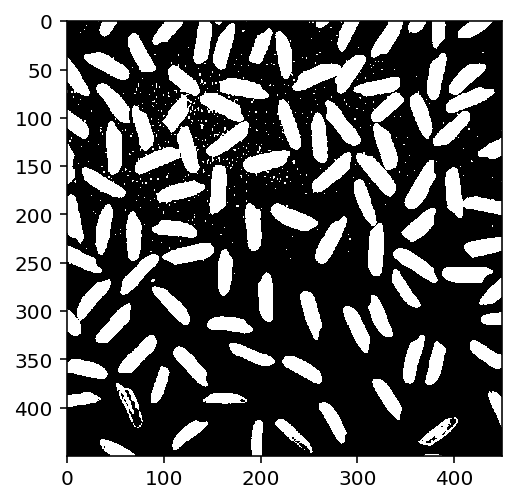

In [9]:
import numpy as np
import PIL.Image
import matplotlib.pyplot as plt
plt.subplots(dpi=72*2)

def toBlackAndWhite(image, threshold):
    image[ image[:,:] <= threshold ] = 0
    image[ image[:,:]  > threshold ] = 255
toBlackAndWhite(monochrome, 120)
plt.imshow(monochrome, cmap="gray")
plt.show()

## 10
You'll notice this generates some speckle.  SciKitImage has an algorithm to remove it, but we have to "label" the image before we can use any SciKitImage algorithms.

To see what "label" does we'll look at part of the image after the speckle is removed and inspect the underlying Numpy array.  Note that:<pre>morphology.remove_small_objects(labelled)</pre>
corrupts the labelling, so we have to reapply labelling after calling "remove_small_objects".

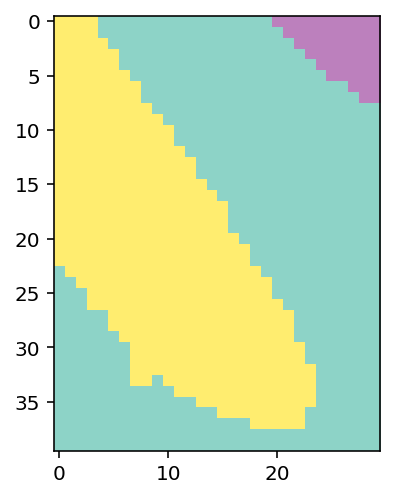

[[17 17 17 ... 14 14 14]
 [17 17 17 ... 14 14 14]
 [17 17 17 ... 14 14 14]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]


In [81]:
import skimage.measure as measure
import skimage.morphology as morphology
plt.subplots(dpi=72*2)

labelled = measure.label(monochrome)
labelled = morphology.remove_small_objects(labelled)
#reapply labelling
labelled = measure.label(labelled)

colorMap = "Set3" 
plt.imshow(labelled[40:80,:30], cmap=colorMap)
plt.show()
print(labelled[40:80,:30])

## 11
So labelling uses the white pixels to identify grains of rice.  In the part of the image shown above, we are seeing a small part of rice grain 14 and most of grain 17.  

The colors displayed in the plot are dependent of the colormap "cool".  Of course the labelling extends across the entire array and we can now determine how many rice grains there are by looking at the largest value in the array: 

Number of grains of rice = 91


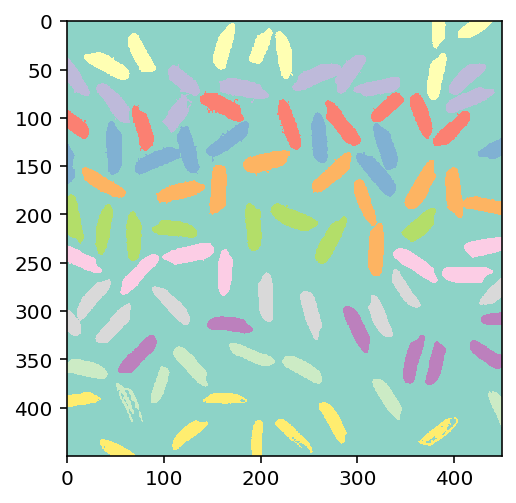

In [82]:
import skimage.measure as measure
import skimage.morphology as morphology
plt.subplots(dpi=72*2)

print(f"Number of grains of rice = {np.amax(labelled)}")
plt.imshow(labelled, cmap=colorMap)
plt.show()

## 12
The labelling not only identifies each grain of rice, but by counting the pixels of a given label we can determine its size.  SciKitImage will do this for us using:
<pre>skimage.measure.regionprops(labelled)</pre>
While calculating the size of each grain, SciKitImage also calculates the position of the surrounding rectangle and its centroid.  

We can add all this information to the image:

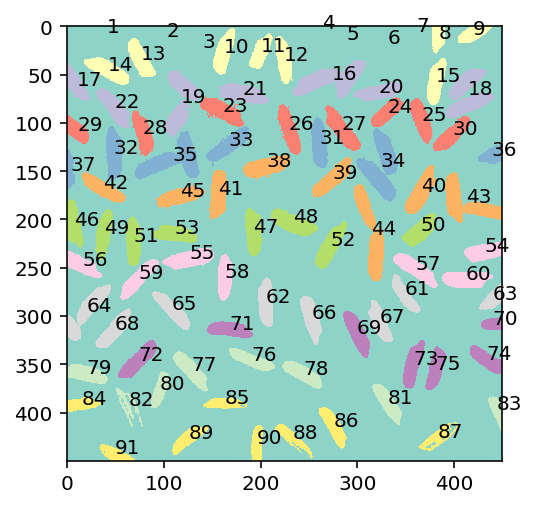

In [83]:
import skimage.measure as measure
import skimage.morphology as morphology
plt.subplots(dpi=72*2)

props = measure.regionprops(labelled)
for item in props:
    y = item.centroid[0]
    x = item.centroid[1]
    message = str(item.label)
    plt.text(x, y, message, color="black")

plt.imshow(labelled, cmap=colorMap)
plt.show()

## 13
Rice grain 85 is an interesting object.  Let's look more closely at that part of the image:

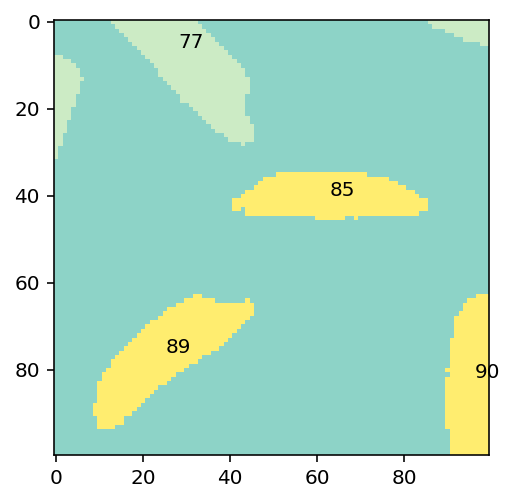

In [88]:
import skimage.measure as measure
import skimage.morphology as morphology
import scipy.ndimage as nd

plt.subplots(dpi=72*2)
top = 350
bottom = 450
left = 100
right = 200
props = measure.regionprops(labelled)
for item in props:
    y = item.centroid[0] - top
    x = item.centroid[1] - left
    if (0 < x < right-left) and (0 < y < bottom-top):
        message = str(item.label)
        plt.text(x, y, message, color="black")

plt.imshow(labelled[top:bottom, left:right], cmap=colorMap)
plt.show()

## 14
Grain 85 has a hole in it.  We can use:<pre>scipy.ndimage.binary_fill_holes</pre>to fill in holes like this:

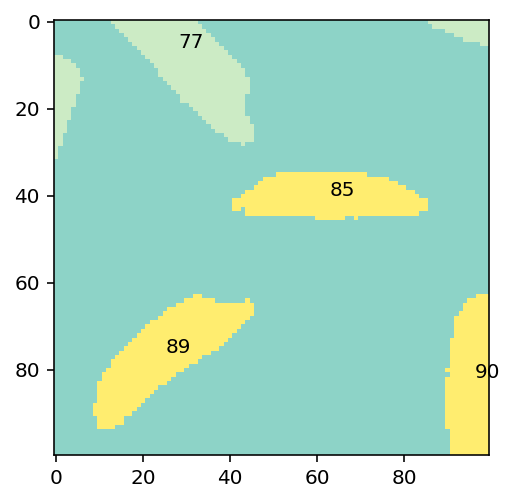

In [89]:
import skimage.measure as measure
import skimage.morphology as morphology
import scipy.ndimage as nd

plt.subplots(dpi=72*2)
labelled = nd.binary_fill_holes(labelled).astype(int)
#reapply labelling
labelled = measure.label(labelled)

top = 350
bottom = 450
left = 100
right = 200
props = measure.regionprops(labelled)

for item in props:
    y = item.centroid[0] - top
    x = item.centroid[1] - left
    if (0 < x < right-left) and (0 < y < bottom-top):
        message = str(item.label)
        plt.text(x, y, message, color="black")

plt.imshow(labelled[top:bottom, left:right], cmap=colorMap)
plt.show()

## 15
SciKitImage has many other algorithms that can be applied to different image types.  
One of the more interesting algorithms is edge detection.  The following edge detection algorithm was developed by John F. Canny in 1986.

For starters we need an image:

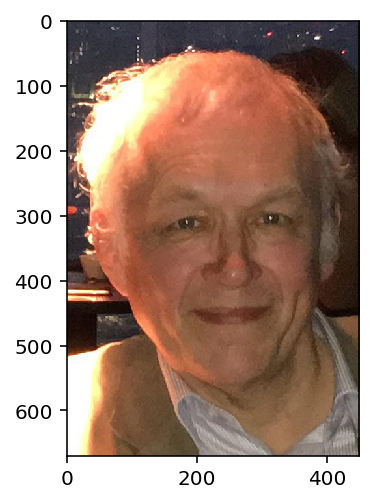

In [94]:
import numpy as np
import PIL.Image
import matplotlib.pyplot as plt
# import PIL.Image as Image
# import PIL.ImageDraw as ImageDraw

plt.subplots(dpi=72*2)
image = PIL.Image.open("images/chris.jpg")
# grid = Image.new('RGBA', size=(image.width, image.height), color=(255,255,255))
# blank = Image.new('RGBA', size=(image.width, image.height), color=(255,255,255))
# step_size = 50

# gridCanvas = ImageDraw.Draw(grid)
# for x in range(0, image.width, step_size):
#     line = ((x, 0), (x, image.height))
#     gridCanvas.line(line, fill=(0, 0, 0), width=1)
    
# for y in range(0, image.height, step_size):
#     line = ((0, y), (image.width, y))
#     gridCanvas.line(line, fill=(0, 0, 0), width=1)

# Make sure images got an alpha channel
#image = image.convert("RGBA")
plt.imshow(image, cmap=plt.cm.gray) #    plt.show()


## 16
This is obviously a color image, but our algorithm requires a monochrome image.  Let's use PIL to perform the conversion (it takes a weighted averaged of the RGB values): 

(670, 450)


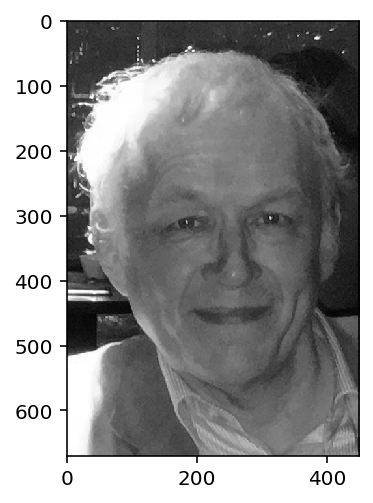

In [100]:
import numpy as np
import PIL.Image
import matplotlib.pyplot as plt
plt.subplots(dpi=72*2)

image = image.convert('L')
image = np.asarray(image, dtype="int32")
plt.imshow(image, cmap=plt.cm.gray) #    plt.show()
print(image.shape)

## 17
According to the docs:

"The Canny filter is a multi-stage edge detector. It uses a filter based on the derivative of a Gaussian in order to compute the intensity of the gradients.The Gaussian reduces the effect of noise present in the image. Then, potential edges are thinned down to 1-pixel curves by removing non-maximum pixels of the gradient magnitude. Finally, edge pixels are kept or removed using hysteresis thresholding on the gradient magnitude.

The Canny has three adjustable parameters: the width of the Gaussian (the noisier the image, the greater the width), and the low and high threshold for the hysteresis thresholding."

Now let's apply the Canny algorithm.  The algorithm depends on the 3 parameters:

* sigma
* low_threshold
* high_threshold

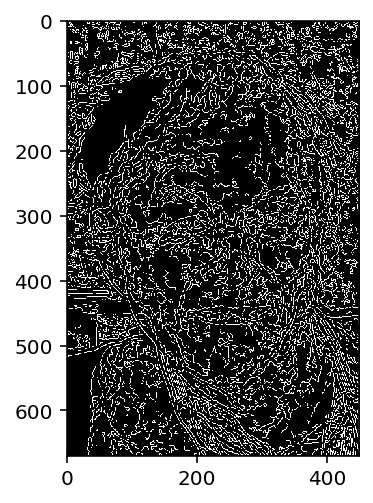

In [104]:
import skimage.feature
plt.subplots(dpi=72*2)

σ = 1
edges = skimage.feature.canny(image, sigma=σ, low_threshold=10, high_threshold=20)
plt.imshow(edges, cmap=plt.cm.gray)
plt.show()

## 18
Looks as though we've made a bad choice of these parameters.  After some trial and error I came up with the following:

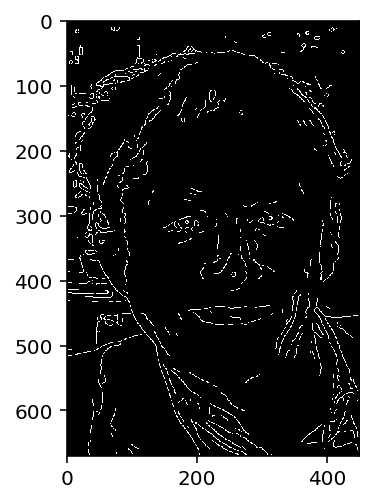

In [117]:
import skimage.feature
plt.subplots(dpi=72*2)

σ = 2
edges = skimage.feature.canny(image, sigma=σ, low_threshold=27, high_threshold=30)
plt.imshow(edges, cmap=plt.cm.gray)
plt.show()

## 19


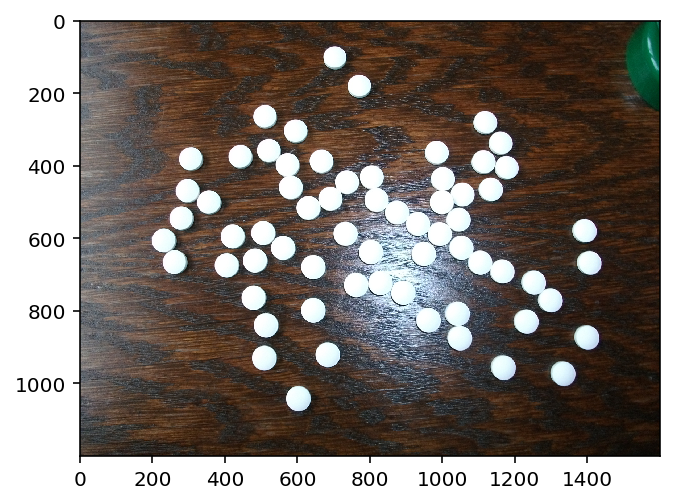

In [114]:
import numpy as np
import PIL.Image
import matplotlib.pyplot as plt
import skimage.io as io 
plt.subplots(dpi=72*2)

tablets = PIL.Image.open("images/tablets.jpg")
tablets = np.asarray(tablets, dtype="int32")
plt.imshow(tablets, cmap="gray")
plt.show()
# Load picture, convert to grayscale and detect edges
# tablets = io.imread("images/tablets.jpg", as_gray=True)

# edges = canny(tablets, sigma=2.0,
#               low_threshold=0.55, high_threshold=0.8)


## 20
Although we've been using the PIL library to load images into memory, SciKitImage has a build in function to do this.  Furthermore, it can convert a color image into greyscale:

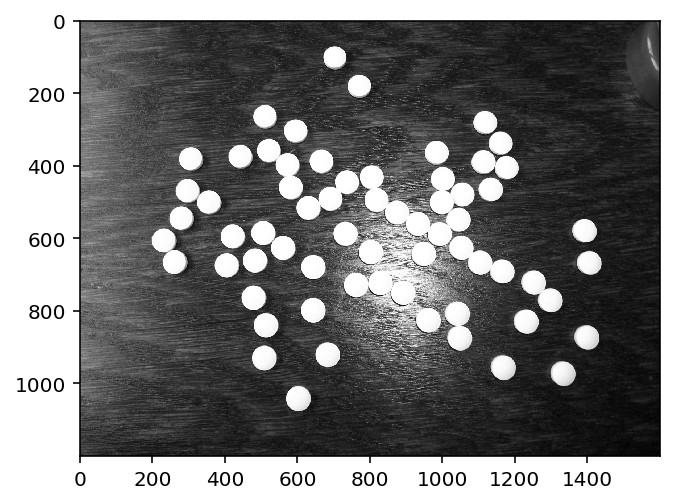

In [116]:
import matplotlib.pyplot as plt
import skimage.io as io 
plt.subplots(dpi=72*2)

tablets = io.imread("images/tablets.jpg", as_gray=True)
plt.imshow(tablets, cmap="gray")
plt.show()

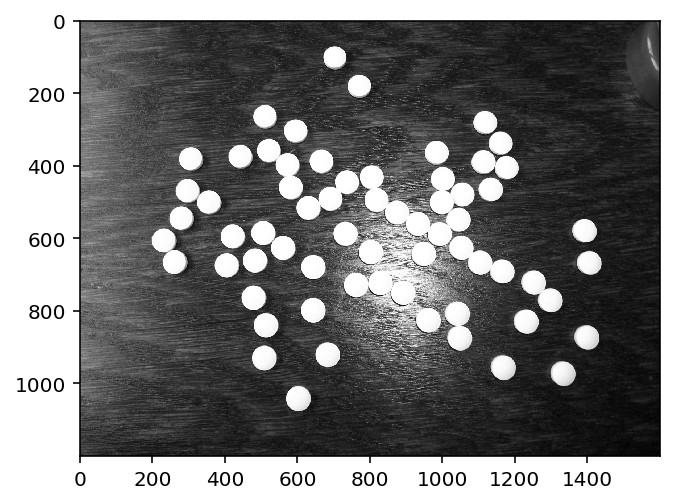

In [115]:
import numpy as np
import PIL.Image
import matplotlib.pyplot as plt
import skimage.io as io 
plt.subplots(dpi=72*2)

tablets = io.imread("images/tablets.jpg", as_gray=True)
plt.imshow(tablets, cmap="gray")
plt.show()
# Load picture, convert to grayscale and detect edges

# edges = canny(tablets, sigma=2.0,
#               low_threshold=0.55, high_threshold=0.8)


## 20


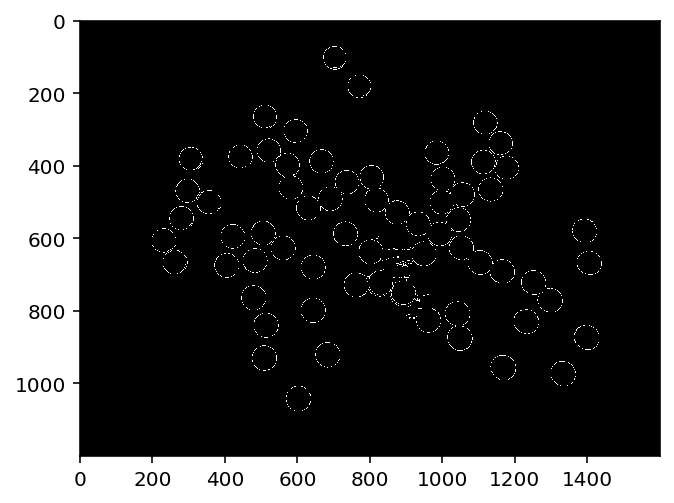

In [137]:
import numpy as np
import PIL.Image
import matplotlib.pyplot as plt
import skimage.feature
import skimage.io as io 
plt.subplots(dpi=72*2)


# Load picture, convert to grayscale and detect edges
tablets = io.imread("images/tablets.jpg", as_gray=True)


# σ = 2
# edges = skimage.feature.canny(image, sigma=σ, low_threshold=27, high_threshold=30)

edges = skimage.feature.canny(tablets, sigma=1.7,
              low_threshold=0.0, high_threshold=0.8)
plt.imshow(edges, cmap="gray")
plt.show()